# Book Publishing

In [1]:
# Imports
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data
uk_pub = pd.read_csv("data/Book Publishing Salary Transparency (UK) - Form responses 1.csv")
pub = pd.read_csv("data/#PUBLISHINGPAIDME - Form Responses 1.csv")

## UK Publishing

#### Checking Data

In [3]:
uk_pub.head()

,Timestamp,Job Title,Employer,Location,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Pubishing,Years of Overall Experience,Additional Compensation,Additional Information,Unnamed: 13,Unnamed: 14
0,17/06/2020 10:42:08,Marketing manager,Penguin Random House,London,£36k,Full-time,White,Woman (cisgender),Straight,3,9,Annual bonus,NaN,NaN,NaN
1,17/06/2020 10:45:51,Early careere coordinator,Penguin random house,London,"23,000 per annum",Full-time,Black african,Woman (cisgender),Bisexual,2,2,Can't remember,NaN,NaN,NaN
2,17/06/2020 10:51:09,Audience and Digital Development Assistant,Penguin random house,London,"£23,000",Full-time,British Indian,Woman (cisgender),Straight,1,4,1% increase after 7 months in line with the re...,I worked in publishing 2016-17. After leaving ...,NaN,NaN
3,17/06/2020 10:58:25,Publicity Officer,Penguin Random House,80 Strand,"£28,000",Full-time,White British,Woman (cisgender),Pansexual,3,6,"Annual bonus of approx £500, all expenses paid...",This role was my first and only role in publis...,NaN,NaN
4,17/06/2020 11:03:40,Creative art worker,Pan Macmillan Publishing,London,£115 per day,Contract,British Indian,Woman (cisgender),Straight,7,10,0,I was pregnant,NaN,NaN


In [4]:
uk_pub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Timestamp                    1018 non-null   object
 1   Job Title                    1020 non-null   object
 2   Employer                     1021 non-null   object
 3   Location                     975 non-null    object
 4   Salary                       1021 non-null   object
 5   Employment Status            1021 non-null   object
 6   Race / Ethnicity             1011 non-null   object
 7   Gender Identity              1020 non-null   object
 8   Sexual Orientation           1008 non-null   object
 9   Years in Pubishing           1008 non-null   object
 10  Years of Overall Experience  986 non-null    object
 11  Additional Compensation      900 non-null    object
 12  Additional Information       420 non-null    object
 13  Unnamed: 13                  7 no

In [5]:
uk_pub.shape

(1021, 15)

#### Cleaning Data

In [6]:
# Drop all columns that we will not be working with
uk_pub = uk_pub.loc[:, 'Salary':'Years of Overall Experience']

In [7]:
# Check missing values
uk_pub.isnull().sum()

Salary                          0
Employment Status               0
Race / Ethnicity               10
Gender Identity                 1
Sexual Orientation             13
Years in Pubishing             13
Years of Overall Experience    35
dtype: int64

In [8]:
# Rename misspelling in column name
uk_pub.rename(columns={'Years in Pubishing':'Years in Publishing'}, inplace=True)

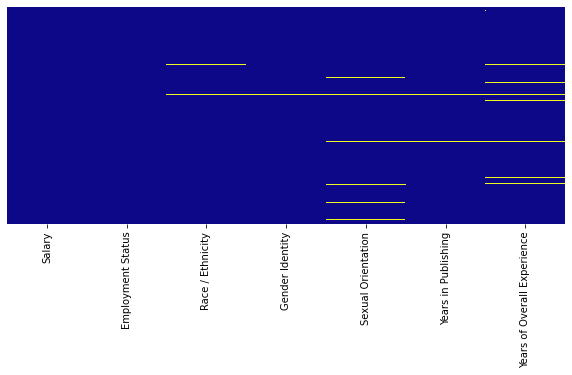

In [9]:
# Visualise missing data
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.heatmap(uk_pub.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [10]:
uk_pub.head()

,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing,Years of Overall Experience
0,£36k,Full-time,White,Woman (cisgender),Straight,3,9
1,"23,000 per annum",Full-time,Black african,Woman (cisgender),Bisexual,2,2
2,"£23,000",Full-time,British Indian,Woman (cisgender),Straight,1,4
3,"£28,000",Full-time,White British,Woman (cisgender),Pansexual,3,6
4,£115 per day,Contract,British Indian,Woman (cisgender),Straight,7,10


#### Years in Publishing Column

In [11]:
# Replace all instances of 'Less than 1' to 0 in 'Years in Publishing' column
uk_pub.loc[uk_pub['Years in Publishing'] == 'Less than 1', 'Years in Publishing'] = 0

In [12]:
# Convert 'Years in Publishing' to numeric data type
uk_pub['Years in Publishing'] = pd.to_numeric(uk_pub['Years in Publishing'], errors='coerce')

In [13]:
# Check value counts for years in publishing
uk_pub['Years in Publishing'].value_counts(dropna=False)

3.0     150
4.0     141
5.0     126
2.0     118
7.0      75
6.0      67
1.0      61
0.0      53
8.0      52
10.0     34
9.0      25
12.0     22
11.0     20
NaN      14
15.0     13
14.0     12
13.0     10
20.0      8
16.0      5
18.0      4
19.0      3
21.0      2
24.0      2
25.0      1
27.0      1
26.0      1
17.0      1
Name: Years in Publishing, dtype: int64

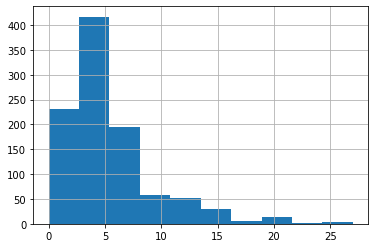

In [14]:
uk_pub['Years in Publishing'].hist();

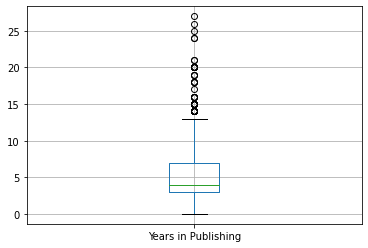

In [15]:
uk_pub.boxplot(column=['Years in Publishing']);

In [16]:
uk_pub[['Years in Publishing']].describe()

,Years in Publishing
count,1007.000000
mean,5.342602
std,4.129225
min,0.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,27.000000


In [17]:
# Due to the number of outliers we will fill the null values with median
uk_pub['Years in Publishing'].fillna(uk_pub['Years in Publishing'].median(), inplace=True)

In [18]:
# Do I need to do anything to deal with the outliers?

#### Years of Overall Experience Column

In [19]:
uk_pub['Years of Overall Experience'].value_counts(dropna=False)

5               124
3               119
4               112
7               101
6                99
10               66
8                66
2                55
12               37
NaN              35
9                35
11               25
1                25
Less than 1      21
14               20
15               18
13               15
20                8
16                6
19                6
17                6
21                6
18                4
25                3
26                2
24                2
23                2
More than 30      1
28                1
30                1
Name: Years of Overall Experience, dtype: int64

In [20]:
# Replace all instances of 'Less than 1' to 0 in 'Years in Publishing' column
uk_pub.loc[uk_pub['Years of Overall Experience'] == 'Less than 1', 'Years of Overall Experience'] = 0

In [21]:
uk_pub.loc[uk_pub['Years of Overall Experience'] == 'More than 30']

,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing,Years of Overall Experience
929,30K,Full-time,English,Prefer not to say,Bisexual,12.0,More than 30


In [22]:
# Drop row where data is not numeric
uk_pub.drop(uk_pub[uk_pub['Years of Overall Experience']  == 'More than 30'].index, inplace = True)

In [23]:
# Convert 'Years in Publishing' to numeric data type
uk_pub['Years of Overall Experience'] = pd.to_numeric(uk_pub['Years of Overall Experience'], errors='coerce')

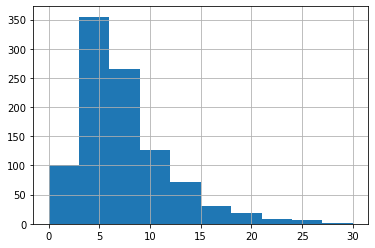

In [24]:
uk_pub['Years of Overall Experience'].hist();

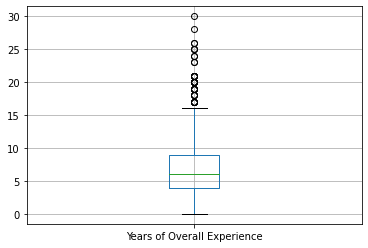

In [25]:
uk_pub.boxplot(column=['Years of Overall Experience']);

In [26]:
# Due to the number of outliers we will fill the null values with median
uk_pub['Years of Overall Experience'].fillna(uk_pub['Years of Overall Experience'].median(), inplace=True)

In [27]:
# Do I need to do anything to deal with the outliers?

#### Gender Identity Column

In [28]:
# Check value counts of Gender Identity
uk_pub['Gender Identity'].value_counts()

Woman (cisgender)                                                           884
Man (cisgender)                                                             110
Prefer not to say                                                            13
Non-binary                                                                    7
Woman (non-binary)                                                            2
Prefer to self-describe                                                       1
https://unitetheunion.org/why-join/membership-types/unite-young-members/      1
White (Scandinavian immigrant)                                                1
Name: Gender Identity, dtype: int64

In [29]:
uk_pub = uk_pub.groupby('Gender Identity').filter(lambda x: len(x) > 5)

In [30]:
# Remove '(cisgender)' from 'Woman' and 'Man'
uk_pub.loc[uk_pub['Gender Identity'] == 'Woman (cisgender)', 'Gender Identity'] = 'Woman'
uk_pub.loc[uk_pub['Gender Identity'] == 'Man (cisgender)', 'Gender Identity'] = 'Man'

In [31]:
# Check value counts of Gender Identity
uk_pub['Gender Identity'].value_counts()

Woman                884
Man                  110
Prefer not to say     13
Non-binary             7
Name: Gender Identity, dtype: int64

In [32]:
# Need to encode these using pd.get_dummies later on

#### Sexual Orientation Column

In [33]:
uk_pub['Sexual Orientation'].value_counts(dropna=False)

Straight                                          733
Bisexual                                          108
Prefer not to say                                  53
Queer                                              32
Gay                                                22
Questioning                                        16
Lesbian                                            14
Pansexual                                          12
NaN                                                12
Asexual                                             9
no labels (not straight but sexuality is fake)      1
Asexual/Queer                                       1
Demisexual                                          1
Name: Sexual Orientation, dtype: int64

In [34]:
# Fill null values with mode
uk_pub['Sexual Orientation'].fillna(uk_pub['Sexual Orientation'].mode()[0], inplace=True)

In [35]:
# Group all non-straight into a single category
uk_pub.loc[uk_pub['Sexual Orientation'] != 'Straight', 'Sexual Orientation'] = 'LGBTQ'

#### Race/Ethnicity Column

In [36]:
uk_pub['Race / Ethnicity'].unique()

array(['White', 'Black african ', 'British Indian', 'White British',
       'British Indian ', 'White British ', 'White Australian',
       'Black Caribbean ', 'Pakistani', 'Caucasian ', 'Black British ',
       'Black', 'White/Irish', 'Caucasian', 'White ', 'Asian',
       'Caucasian / Greek', 'Chinese', 'White, British',
       'White (Not British)', 'White/irish', 'White/British',
       'British Asian', 'Mixed (White British and British Indian)',
       'Mixed', 'Black/African-British', 'White (other)',
       'Mixed race - White and East Asian', 'white', 'White European',
       'South Asian ', 'White/European', 'South Asian', 'white british',
       'Mixed white and asian', 'White british', 'Black British',
       'Mixed - White/Asian', 'South-Asian', 'white (other)',
       'Mixed (White and Asian)', 'Mixed Afro/Indo Caribbean and White',
       'White/Irish ', 'British Asian ', 'South Asian origin',
       'British Asian - Indian ', 'Black African ',
       'British Asian - Ind

In [37]:
# Fill null values with mode
uk_pub['Race / Ethnicity'].fillna(uk_pub['Race / Ethnicity'].mode()[0], inplace=True)

In [38]:
# Correct values before applying function
uk_pub.loc[uk_pub['Race / Ethnicity'] == 'Not white', 'Race / Ethnicity'] = 'Other'
uk_pub.loc[uk_pub['Race / Ethnicity'] == 'Whote', 'Race / Ethnicity'] = 'White'
uk_pub.loc[uk_pub['Race / Ethnicity'] == 'British Insian', 'Race / Ethnicity'] = 'British Indian'

In [39]:
# Check for matches of specific races
uk_pub[uk_pub['Race / Ethnicity'].str.match('Chinese')]['Race / Ethnicity']

32           Chinese
77           Chinese
252          Chinese
462    Chinese/White
492          Chinese
616          Chinese
653          Chinese
734          Chinese
Name: Race / Ethnicity, dtype: object

In [40]:
# Function for simplifying race
def simplify_race(x):
    if 'mixed' in x.lower():
        return 'Mixed'
    elif 'black' in x.lower() or 'bame' in x.lower():
        return 'Black'
    elif 'asian' in x.lower() or 'chinese' in x.lower() or 'indian' in x.lower() or \
                                 'pakistani' in x.lower() or 'bangladeshi' in x.lower():
        return 'Asian'
    elif 'white' in x.lower():
        return 'White'
    else:
        return 'Other'

In [41]:
# Apply function
uk_pub['Race / Ethnicity'] = uk_pub['Race / Ethnicity'].apply(simplify_race)

In [42]:
# Check number of unique values
uk_pub['Race / Ethnicity'].nunique()

5

In [43]:
uk_pub.head()

,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing,Years of Overall Experience
0,£36k,Full-time,White,Woman,Straight,3.0,9.0
1,"23,000 per annum",Full-time,Black,Woman,LGBTQ,2.0,2.0
2,"£23,000",Full-time,Asian,Woman,Straight,1.0,4.0
3,"£28,000",Full-time,White,Woman,LGBTQ,3.0,6.0
4,£115 per day,Contract,Asian,Woman,Straight,7.0,10.0


#### Employment Status Column

In [44]:
# Check unique values
uk_pub['Employment Status'].unique()

array(['Full-time', 'Contract', 'Part-time', 'Parental leave cover',
       'Part-Time (32 hours per week)',
       'full-time but no contract, paid hourly',
       "I have just left this job but feel it's important for it to be logged",
       'Left position in 2019 due to low salary',
       "Full Time but wasn't permanent - they made anyone who wasn't permanent take unpaid six week breaks before you reached two years and then would hire you again ",
       'Rolling temp contract', 'intern', 'Freelance'], dtype=object)

In [45]:
# Function for simplifying employment status
def simplify_employment_status(x):
    if 'part-time' in x.lower():
        return 'Part-time'
    elif 'full-time' in x.lower():
        return 'Full-time'
    elif 'contract' in x.lower():
        return 'Contract'
    else:
        return 'Other'

In [46]:
# Apply function
uk_pub['Employment Status'] = uk_pub['Employment Status'].apply(simplify_employment_status)

In [47]:
uk_pub.head()

,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing,Years of Overall Experience
0,£36k,Full-time,White,Woman,Straight,3.0,9.0
1,"23,000 per annum",Full-time,Black,Woman,LGBTQ,2.0,2.0
2,"£23,000",Full-time,Asian,Woman,Straight,1.0,4.0
3,"£28,000",Full-time,White,Woman,LGBTQ,3.0,6.0
4,£115 per day,Contract,Asian,Woman,Straight,7.0,10.0


#### Salary Column

In [48]:
uk_pub[['Salary']].head(3)

,Salary
0,£36k
1,"23,000 per annum"
2,"£23,000"


In [49]:
# Apply regex expression to extract correct salary values
def extract_salary(x):
    if re.search(r"^£\d+,[0-9]{3}.{0,21}$", x):
        return x.replace(',', '')[1:6]
    elif re.search(r"^£?\d\d[kK]\s?$", x): 
        return x[-3:-1] + "000"
    elif re.search(r"^\d+[,.\s]\s?0", x):
        return x[:2] + "000"
    elif re.search(r"^\d+[,.\s]\s?0{3}", x):
        return x[0:2] + "000"
    elif re.search("^£?\d{5}0?", x):
        x = x.strip('£')
        if '.' in x:
            return x[:5]
        else:
            return x.split(' ')[0]
    elif re.search(r"[kK]$", x):
        if '.' in x:
            return x.split('.')[0][-2:] + x.split('.')[1][0] + "00"
        elif '-' in x:
            return x.split('-')[1][:2] + "000"
        else:
            return x[-3:-1] + "000"
    else:
        return x

In [50]:
# Map function to each salary element
uk_pub['Salary'] = uk_pub['Salary'].map(extract_salary)

In [51]:
uk_pub.head(20)

,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing,Years of Overall Experience
0,36000,Full-time,White,Woman,Straight,3.0,9.0
1,23000,Full-time,Black,Woman,LGBTQ,2.0,2.0
2,23000,Full-time,Asian,Woman,Straight,1.0,4.0
3,28000,Full-time,White,Woman,LGBTQ,3.0,6.0
4,£115 per day,Contract,Asian,Woman,Straight,7.0,10.0
5,"£21k starting, £27k 5 years later",Full-time,White,Woman,Straight,6.0,10.0
6,31000,Full-time,White,Woman,Straight,3.0,12.0
7,"£25,000 entering in Sept 2016, £29,248.44 exit...",Full-time,White,Woman,Straight,3.0,11.0
8,25500,Full-time,Black,Woman,Straight,1.0,12.0
9,26600,Full-time,White,Woman,LGBTQ,4.0,4.0


In [52]:
# £115 per day --> (52(week)*5(work days) - 20(days holiday))*115(day rate)
uk_pub.loc[uk_pub['Salary'] == '£115 per day ', 'Salary'] = '27600'

# # £21k starting, £27k 5 years later 
uk_pub.loc[uk_pub['Salary'] == '£21k starting, £27k 5 years later ', 'Salary'] = '27000'

# £25,000 entering in Sept 2016, £29,248.44 exiting in Sept 2019
uk_pub.loc[uk_pub['Salary'] == '£25,000 entering in Sept 2016, £29,248.44 exiting in Sept 2019', 'Salary'] = '29248'

# £30,000 (as of 2020; started role in 2016)
uk_pub.loc[uk_pub['Salary'] == '£30,000 (as of 2020; started role in 2016)', 'Salary'] = '30000'

# 20k starting
uk_pub.loc[uk_pub['Salary'] == '20k starting', 'Salary'] = '20000'

# 34
uk_pub.loc[uk_pub['Salary'] == '34', 'Salary'] = '34000'

# 28.50£
uk_pub.loc[uk_pub['Salary'] == '28.50£', 'Salary'] = '28500'

# £25, 000
uk_pub.loc[uk_pub['Salary'] == '£25, 000', 'Salary'] = '25000'

# approx £11-13,000 p.a.
uk_pub.loc[uk_pub['Salary'] == 'approx £11-13,000 p.a.', 'Salary'] = '13000'

# £38.5k (increase to £40k delayed by covid)
uk_pub.loc[uk_pub['Salary'] == '£38.5k (increase to £40k delayed by covid)', 'Salary'] = '40000'

# 21.5
uk_pub.loc[uk_pub['Salary'] == '21.5', 'Salary'] = '21500'

# £24K annually 
uk_pub.loc[uk_pub['Salary'] == '£24K annually ', 'Salary'] = '24000'

# £18,000 (£19k after 6-month probation)
uk_pub.loc[uk_pub['Salary'] == '£18,000 (£19k after 6-month probation)', 'Salary'] = '19000'

# £23k to start rising to £23,500
uk_pub.loc[uk_pub['Salary'] == '£23k to start rising to £23,500', 'Salary'] = '23500'

# £26 266
uk_pub.loc[uk_pub['Salary'] == '£26 266', 'Salary'] = '26266'

# 28
uk_pub.loc[uk_pub['Salary'] == '28', 'Salary'] = '28000'

# £15.5k (2015), £16.9k (2016), £18.9k (2017)
uk_pub.loc[uk_pub['Salary'] == '£15.5k (2015), £16.9k (2016), £18.9k (2017)', 'Salary'] = '18900'

# £22,000 start, £24,000 2 years on
uk_pub.loc[uk_pub['Salary'] == '£22,000 start, £24,000 2 years on', 'Salary'] = '24000'

# 31'800
uk_pub.loc[uk_pub['Salary'] == "31'800", 'Salary'] = '31800'

# £38
uk_pub.loc[uk_pub['Salary'] == '£38', 'Salary'] = '38000'

# £28k pro rata
uk_pub.loc[uk_pub['Salary'] == '£28k pro rata', 'Salary'] = '28000'

# 34,850 (full time)
uk_pub.loc[uk_pub['Salary'] == '34,850 (full time)', 'Salary'] = '34850'

# 5k000
uk_pub.loc[uk_pub['Salary'] == '5k000', 'Salary'] = '50000'

# Started at £21500 but increased to £22500 after a year
uk_pub.loc[uk_pub['Salary'] == 'Started at £21500 but increased to £22500 after a year', 'Salary'] = '22500'

In [53]:
# Drop rows where people do not make a salary

# List of entries that mean no salary
no_salary = ['Unpaid with £100/week stipend', '0']

# Find indexes of people with no salary
ppl_no_salary = uk_pub[uk_pub['Salary'].isin(no_salary)].index

# Remove people with no salary 
uk_pub = uk_pub[~uk_pub.index.isin(ppl_no_salary)]

In [ ]:
# TESTING AND CHECKING

In [55]:
uk_pub.loc[~uk_pub['Salary'].str.contains('^\d\d\d\d\d$') == True]['Salary'].tolist()

['120000']

In [54]:
len(uk_pub.loc[~uk_pub['Salary'].str.contains('^\d\d\d\d\d$') == True]['Salary'].tolist())

1

In [ ]:
test_re = uk_pub.loc[~uk_pub['Salary'].str.contains('^\d\d\d\d\d$') == True]['Salary'].tolist()

In [ ]:
# Salary very high, maybe a mistake
uk_pub[uk_pub.index == 955]